In [23]:
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd

In [1]:
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [19]:
data_dirs = {
    'coal_mines':           './../data/assets/coal_mines.geojson',
    'oil_fields':           './../data/assets/fields.geojson',
    'well_pads':            './../data/assets/well_pads.geojson',
    'processing_plants':    './../data/assets/processing_plants.geojson',
    'refineries':           './../data/assets/refineries.geojson',
    'ports':                './../data/assets/ports.geojson',
    'lng':                  './../data/assets/lng.geojson',
    'shipping':             './../data/assets/shipping_routes.geojson',
    'pipelines':            './../data/assets/pipelines.geojson',
    'railways':             './../data/assets/railways.geojson',
    'power_stations':       './../data/assets/power_stations.geojson',
}

In [10]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [25]:
data = {}

In [26]:
for kk,vv in data_dirs.items():#
    print (kk)
    gj = json.load(open(vv,'r',encoding="ISO-8859-1"))
    data[kk]=gpd.GeoDataFrame([ft['properties'] for ft in gj['features']],geometry=[geometry.shape(ft['geometry']) for ft in gj['features']], crs={'init':'epsg:4326'})

coal_mines
oil_fields
well_pads
processing_plants
refineries
ports
lng
shipping
pipelines
railways
power_stations


In [27]:
data['cities'] = gpd.read_file('./../data/GHSL_UCDB/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_1.gpkg')

In [40]:
data['power_stations'] = data['power_stations'][data['power_stations'].fuel1.isin(['Coal','Oil','Gas'])]

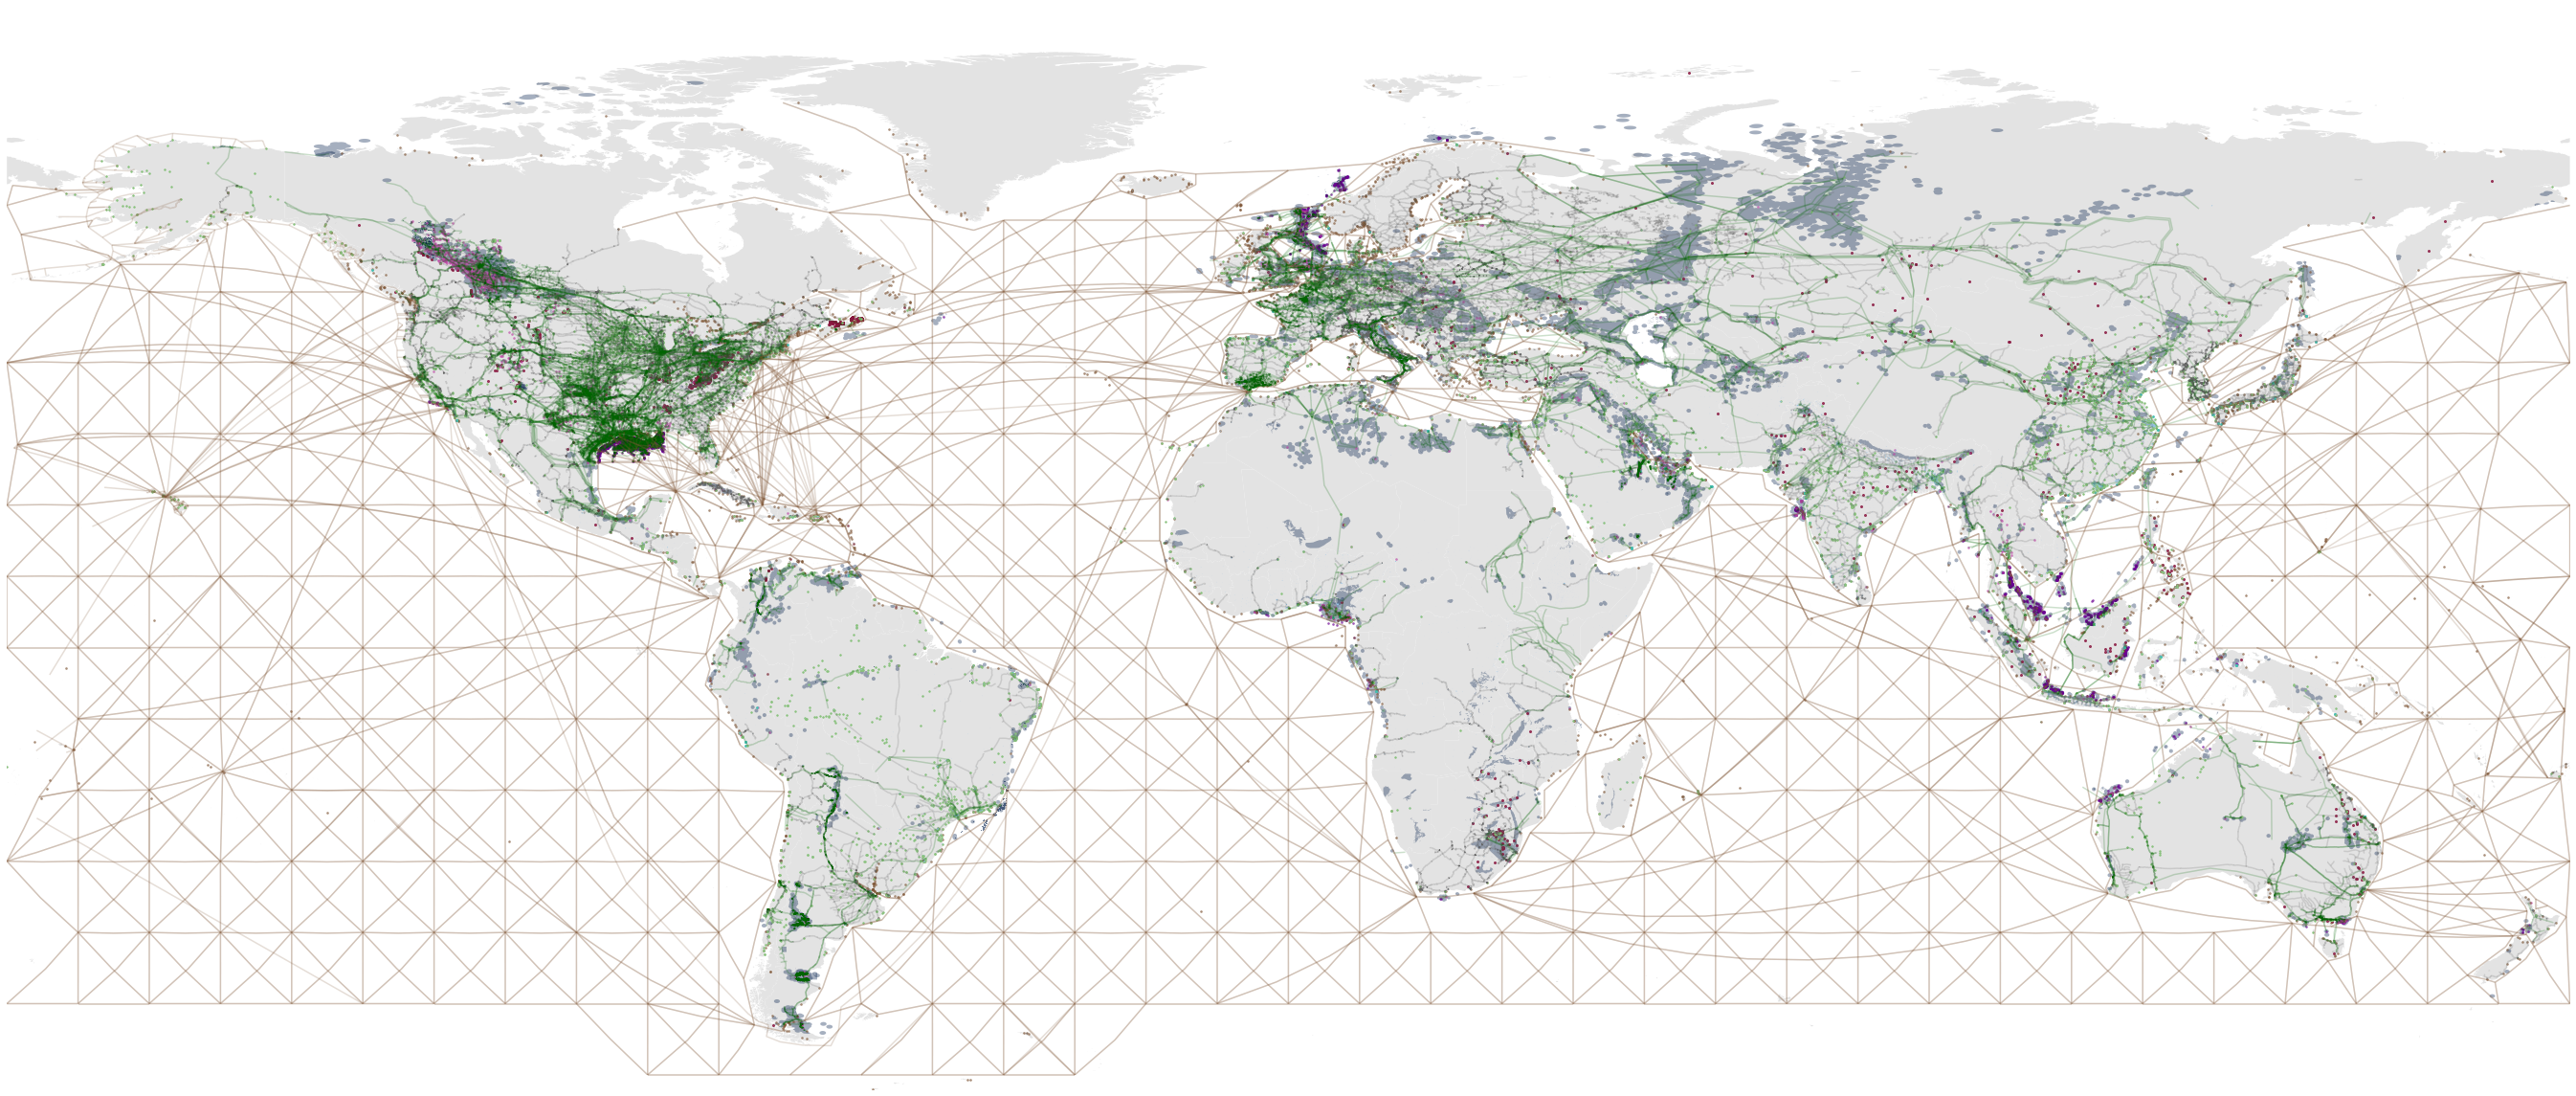

In [61]:
## Global - all supply chains
fig, ax = plt.subplots(1,1,figsize=(48,27))
ne.plot(ax=ax, color='#e3e3e3')

data['railways'].plot(ax=ax, color=colors['railways'], alpha=0.2)
data['pipelines'].plot(ax=ax, color=colors['pipelines'], alpha=0.2)
data['shipping'].plot(ax=ax, color=colors['shipping'], alpha=0.2)

data['oil_fields'].plot(ax=ax, color=colors['oil_fields'], markersize=3, alpha=0.35)
data['well_pads'].plot(ax=ax, color=colors['well_pads'], markersize=3, alpha=0.5)
data['coal_mines'].plot(ax=ax, color=colors['coal_mines'], markersize=4, alpha=0.8)

data['processing_plants'].plot(ax=ax, color=colors['processing_plants'],markersize=3, alpha=0.5)
data['refineries'].plot(ax=ax, color=colors['refineries'],markersize=3, alpha=0.5)

data['ports'].plot(ax=ax, color=colors['ports'],markersize=3, alpha=0.5)
data['lng'].plot(ax=ax, color=colors['lng'],markersize=3)

data['power_stations'].plot(ax=ax, color=colors['power_stations'], markersize=2)
data['cities'].plot(ax=ax, color=colors['cities'])

ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('ff_supplychain.png')
plt.show()

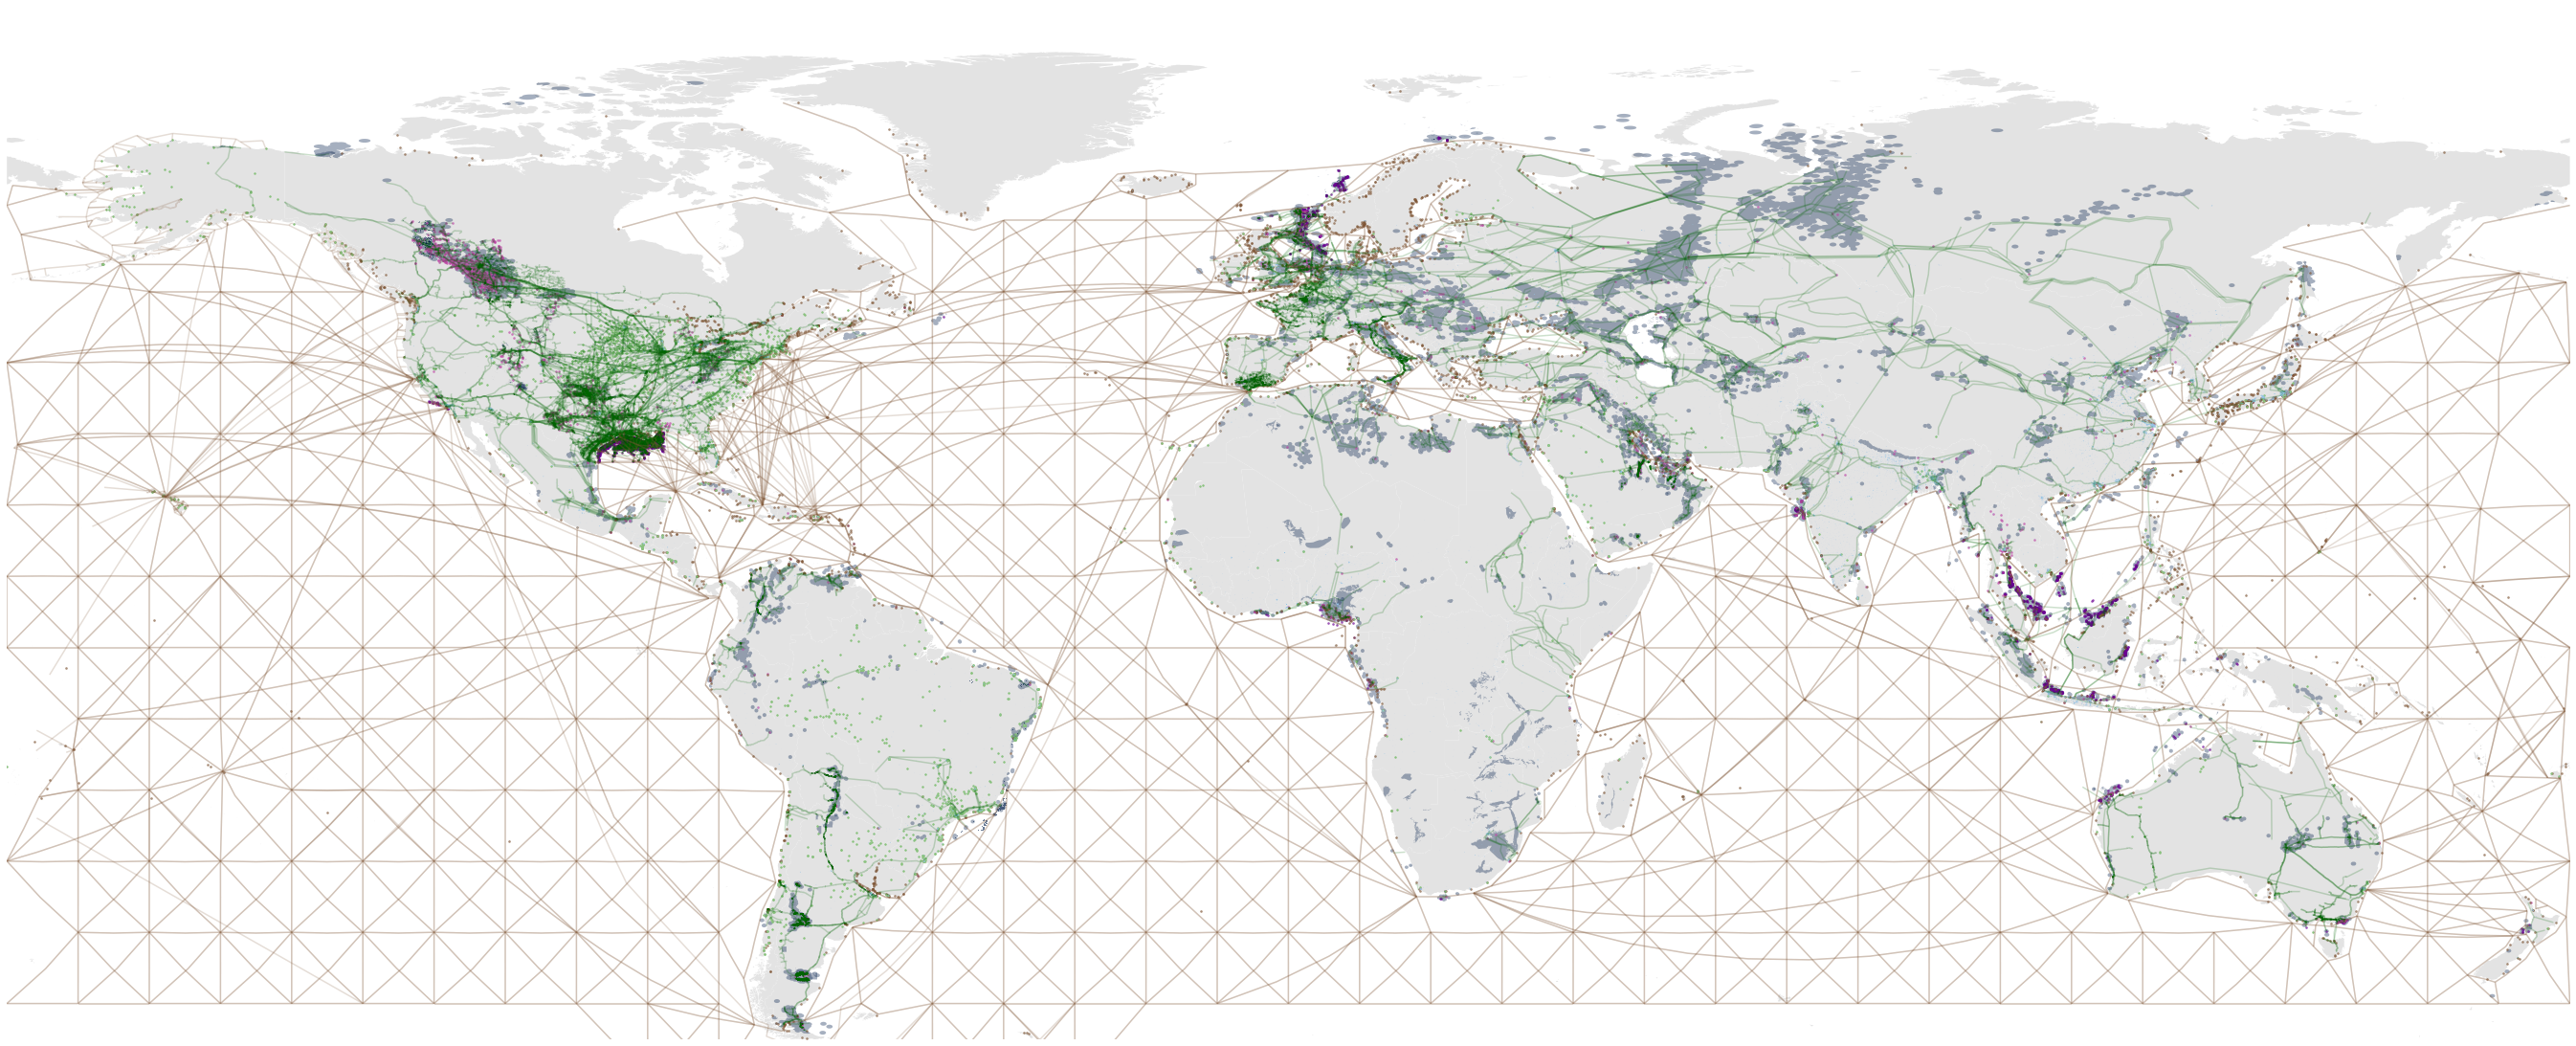

In [62]:
## Oil
fig, ax = plt.subplots(1,1,figsize=(48,27))
ne.plot(ax=ax, color='#e3e3e3')

#data['railways'].plot(ax=ax, color=colors['railways'], alpha=0.2)
data['pipelines'].plot(ax=ax, color=colors['pipelines'], alpha=0.2)
data['shipping'].plot(ax=ax, color=colors['shipping'], alpha=0.2)

data['oil_fields'].plot(ax=ax, color=colors['oil_fields'], markersize=3, alpha=0.35)
data['well_pads'].plot(ax=ax, color=colors['well_pads'], markersize=3, alpha=0.5)
#data['coal_mines'].plot(ax=ax, color=colors['coal_mines'], markersize=4, alpha=0.8)

data['processing_plants'].plot(ax=ax, color=colors['processing_plants'],markersize=3, alpha=0.5)
data['refineries'].plot(ax=ax, color=colors['refineries'],markersize=3, alpha=0.5)

data['ports'].plot(ax=ax, color=colors['ports'],markersize=3, alpha=0.5)
#data['lng'].plot(ax=ax, color=colors['lng'],markersize=3)

data['power_stations'][data['power_stations'].fuel1=='Oil'].plot(ax=ax, color=colors['power_stations'], markersize=2)
data['cities'].plot(ax=ax, color=colors['cities'])

ax.set_xlim([-180,180])
ax.set_ylim([-55,90])
ax.axis('off')
fig.savefig('oil_supplychain.png')
plt.show()

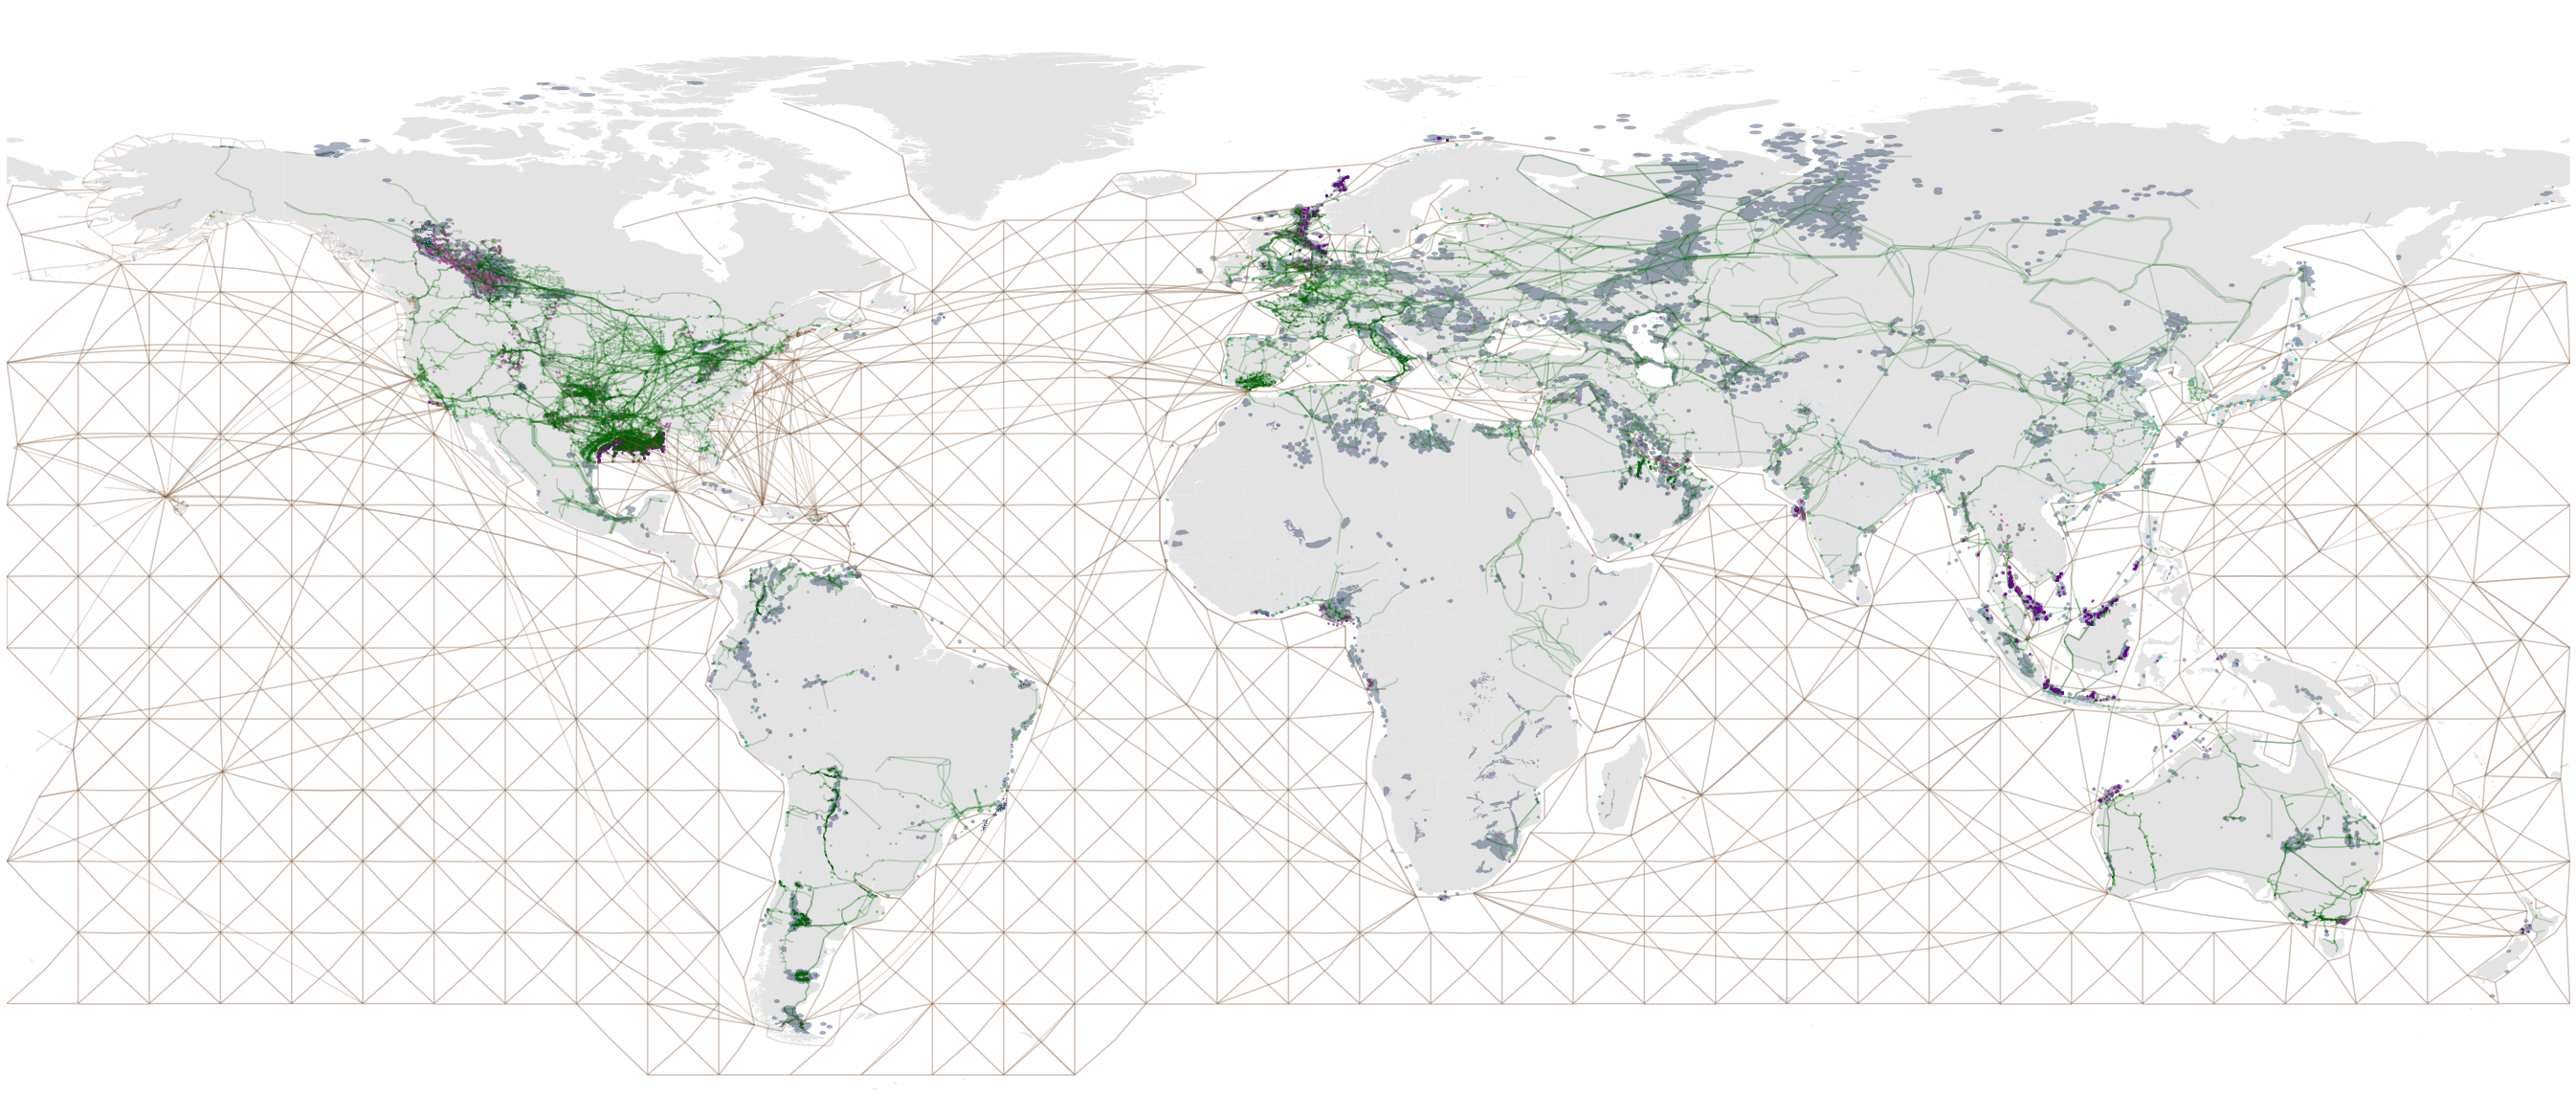

In [63]:
## Gas
fig, ax = plt.subplots(1,1,figsize=(48,27))
ne.plot(ax=ax, color='#e3e3e3')

#data['railways'].plot(ax=ax, color=colors['railways'], alpha=0.2)
data['pipelines'].plot(ax=ax, color=colors['pipelines'], alpha=0.2)
data['shipping'].plot(ax=ax, color=colors['shipping'], alpha=0.2)

data['oil_fields'].plot(ax=ax, color=colors['oil_fields'], markersize=3, alpha=0.35)
data['well_pads'].plot(ax=ax, color=colors['well_pads'], markersize=3, alpha=0.5)
#data['coal_mines'].plot(ax=ax, color=colors['coal_mines'], markersize=4, alpha=0.8)

data['processing_plants'].plot(ax=ax, color=colors['processing_plants'],markersize=3, alpha=0.5)
data['refineries'].plot(ax=ax, color=colors['refineries'],markersize=3, alpha=0.5)

#data['ports'].plot(ax=ax, color=colors['ports'],markersize=3, alpha=0.5)
data['lng'].plot(ax=ax, color=colors['lng'],markersize=3)

data['power_stations'][data['power_stations'].fuel1=='Gas'].plot(ax=ax, color=colors['power_stations'], markersize=2)
data['cities'].plot(ax=ax, color=colors['cities'])

ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('gas_supplychain.png')
plt.show()

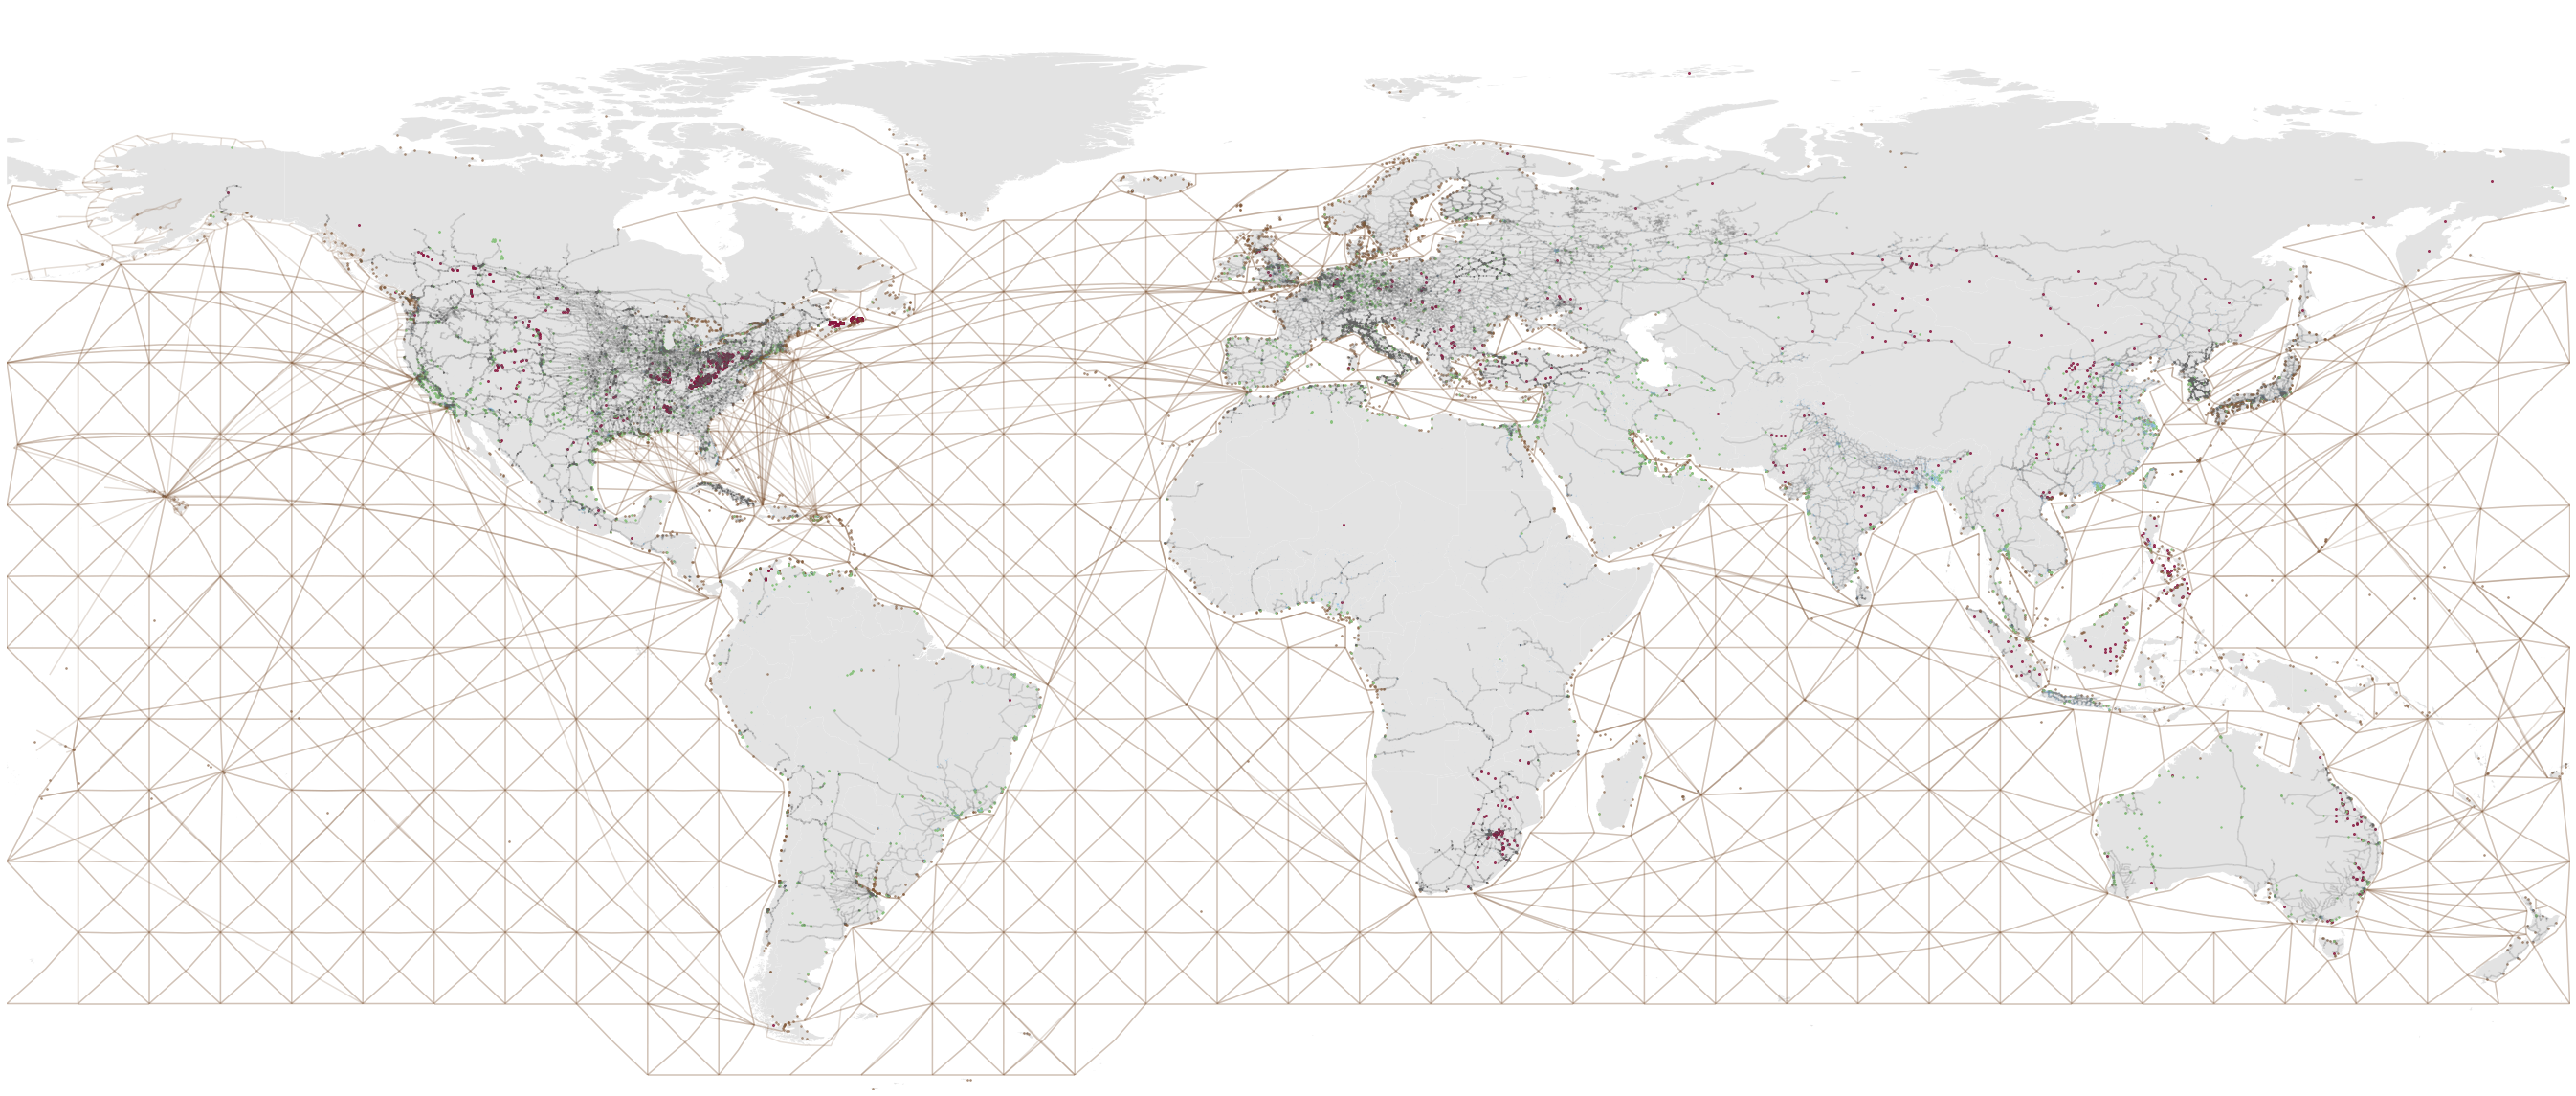

In [65]:
## Coal
fig, ax = plt.subplots(1,1,figsize=(48,27))
ne.plot(ax=ax, color='#e3e3e3')

data['railways'].plot(ax=ax, color=colors['railways'], alpha=0.2)
#data['pipelines'].plot(ax=ax, color=colors['pipelines'], alpha=0.2)
data['shipping'].plot(ax=ax, color=colors['shipping'], alpha=0.2)

#data['oil_fields'].plot(ax=ax, color=colors['oil_fields'], markersize=3, alpha=0.5)
#data['well_pads'].plot(ax=ax, color=colors['well_pads'], markersize=3, alpha=0.5)
data['coal_mines'].plot(ax=ax, color=colors['coal_mines'], markersize=4, alpha=0.8)

#data['processing_plants'].plot(ax=ax, color=colors['processing_plants'],markersize=3, alpha=0.5)
#data['refineries'].plot(ax=ax, color=colors['refineries'],markersize=3, alpha=0.5)

data['ports'].plot(ax=ax, color=colors['ports'],markersize=3, alpha=0.5)
#data['lng'].plot(ax=ax, color=colors['lng'],markersize=3)

data['power_stations'][data['power_stations'].fuel1=='Gas'].plot(ax=ax, color=colors['power_stations'], markersize=2)
data['cities'].plot(ax=ax, color=colors['cities'])

ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('coal_supplychain.png')
plt.show()

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(48,27))

for ft in countries['features']:
    country_shp = geometry.shape(ft['geometry'])
    if country_shp.type=='MultiPolygon':
        for poly in list(country_shp):
            xs,ys = poly.exterior.xy
            axs.plot(xs, ys, color='#d4d6d8', zorder=1)
    else:
        xs, ys = country_shp.exterior.xy
        axs.plot(xs, ys, color='#d4d6d8', zorder=1)
"""        
### do oil fields
for ii_f,ft in enumerate(data['fields']['features']):
    geo_shp = geometry.shape(ft['geometry'])
    if geo_shp.type=='MultiPolygon':
        for poly in list(geo_shp):
            xs,ys = poly.exterior.xy
            axs.plot(xs, ys, color=meta['fields']['color'],alpha=0.5, zorder=2)
    else:
        xs, ys = geo_shp.exterior.xy
        axs.plot(xs, ys, color=meta['fields']['color'], alpha=0.5,zorder=2)
    if ii_f %5000==0:
        print ('fields',ii_f, ii_f/25000.)
"""
    
### do line collections
for inf_type in ['railways','railways_osm','pipelines','shipping_routes']:
    m = len(data[inf_type]['features'])
    print ('inf type:',inf_type,m)
    segments = []
    for ii_f,ft in enumerate(data[inf_type]['features']):
        geo_shp = geometry.shape(ft['geometry'])

        if geo_shp.type=='MultiLineString':
            for ll in list(geo_shp):
                segments.append(list(ll.coords))

        else:
            #print (dir(geo_shp.coords))
            #print (list(geo_shp.coords))
            segments.append(list(geo_shp.coords))

        if int(ii_f/m*100000) % 10000==0:
            print (ii_f/m, ii_f)

    #print (segments)

    line_segments = LineCollection(segments, color=meta[inf_type]['color'], alpha=0.5,zorder=3)
    axs.add_collection(line_segments)
    
for inf_type in ['lng','ports','coal_mines_oxeo', 'coal_mines']:


    xs = []
    ys = []
    for ft in data[inf_type]['features']:
        x,y = geometry.shape(ft['geometry']).xy
        xs.append(x)
        ys.append(y)
    axs.scatter(xs,ys,color=meta[inf_type]['color'],alpha=0.5, zorder=4)
    print (inf_type, len(xs))
    
for inf_type in ['processing_plants','refineries','well_pads']:


    xs = []
    ys = []
    for ft in data[inf_type]['features']:
        x,y = geometry.shape(ft['geometry']).xy
        xs.append(x)
        ys.append(y)
    axs.scatter(xs,ys,color=meta[inf_type]['color'],alpha=0.5,s=5, zorder=4)
    print (inf_type, len(xs))

"""
### do PSs
xs, ys = [],[]
for ii_f,ft in enumerate(GPPD):
    if (ft['fuel1'] in ['Oil','Gas','Coal'] and ft['longitude']<180 and ft['longitude']>-180 and ft['latitude']<89 and ft['latitude']>-89):
        pt = geometry.Point([ft['longitude'],ft['latitude']])
        xs.append(pt.x)
        ys.append(pt.y)

    if ii_f%1000==0:
        print (ii_f)
    #axs.scatter(pt.x, pt.y, color=cols_dict[ft['fuel1']], s=np.log(ft['capacity_mw']), zorder=2)

axs.scatter(xs, ys, color=meta['power_stations']['color'], alpha=0.5,s=5, zorder=5)

### do pop clusters
for ii_f,ft in enumerate(data['pop_clusters']['features']):
    geo_shp = geometry.shape(ft['geometry'])
    if geo_shp.type=='MultiPolygon':
        for poly in list(geo_shp):
            xs,ys = poly.exterior.xy
            axs.plot(xs, ys, color=meta['pop_clusters']['color'],alpha=0.5, zorder=5)
    else:
        xs, ys = geo_shp.exterior.xy
        axs.plot(xs, ys, color=meta['pop_clusters']['color'], alpha=0.5,zorder=5)
    if ii_f %5000==0:
        print ('pop_clusters',ii_f)

"""
plt.show()